## Multivariate normal distribution

In [1]:
import mnist_utils as utils;
import numpy as np;
import scipy.stats as st;
import sklearn.metrics as mt;
%matplotlib inline

In [2]:
# Importing training data
trainD, trainL = utils.loadset("../data/train-images.idx3-ubyte", "../data/train-labels.idx1-ubyte");
# Importing test data
testD, testL = utils.loadset("../data/t10k-images.idx3-ubyte", "../data/t10k-labels.idx1-ubyte");

#### Calculating mean for every digit

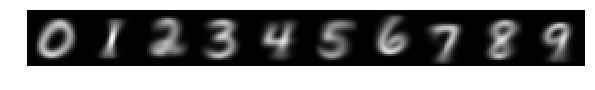

In [3]:
# Get list of all images per digit
digits = np.array(list(map(lambda d: utils.getalldigits(d, trainD, trainL), np.arange(10))));
# Calculate means per digit
means = np.array([np.mean(digits[i], axis = 0) for i in range(len(digits))])
# Display mean for every digit
utils.showimgset(means, y = 1);

#### Classifying with identity matrix as covariance matrix

In [4]:
# Creating distributions for every digit's mean
distributions = [st.multivariate_normal(
    mean = means[i].flatten(),
    cov = 1,
    allow_singular=True
) for i in range(len(digits))];

In [5]:
# Initializing empty result list
rslt = [];
# Classifying test data
for tl in zip(testD, testL):
    # Label data as digit of the distribution with the highest probability
    rslt += [[tl[1], np.argmax(list(map(lambda n: n.logpdf(tl[0].flatten()), distributions)))]];
# Convert result to numpy array for slicing
rslt = np.array(rslt);

Zero-one-loss: 0.179700 
Confusion Matrix:


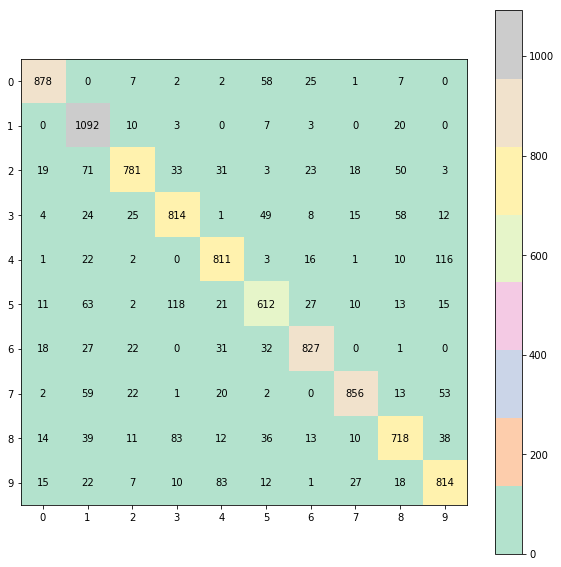

In [6]:
# Calculate confusion matrix
cm = mt.confusion_matrix(list(rslt[:,0]), list(rslt[:,1]));
# Display confusion matrix
utils.showconfmatrix(cm, np.arange(10));
# Calculate zero one loss
zol = mt.zero_one_loss(list(rslt[:,0]), list(rslt[:,1]));
print("Zero-one-loss: {0:2.6f} \r\nConfusion Matrix:".format(zol));

#### Classifying with variance around mean as diagonal matrix, pixelwise

In [7]:
# Creating distributions for every digit's mean
distributions_var = [st.multivariate_normal(
    mean = means[i].flatten(),
    # Flatten every digit and calculate variance over all images of a digit pixelwise
    cov = np.var(np.array(list(map(lambda d: d.flatten(), digits[i]))), axis = 0),
    allow_singular=True
) for i in range(len(digits))];

In [8]:
# Initializing empty result list
rslt_var = [];
# Classifying test data
for tl in zip(testD, testL):
    # Label data as digit of the distribution with the highest probability
    rslt_var += [[tl[1], np.argmax(list(map(lambda n: n.logpdf(tl[0].flatten()), distributions_var)))]];
# Convert result to numpy array for slicing
rslt_var = np.array(rslt_var);

Zero-one-loss: 0.351700 
Confusion Matrix:


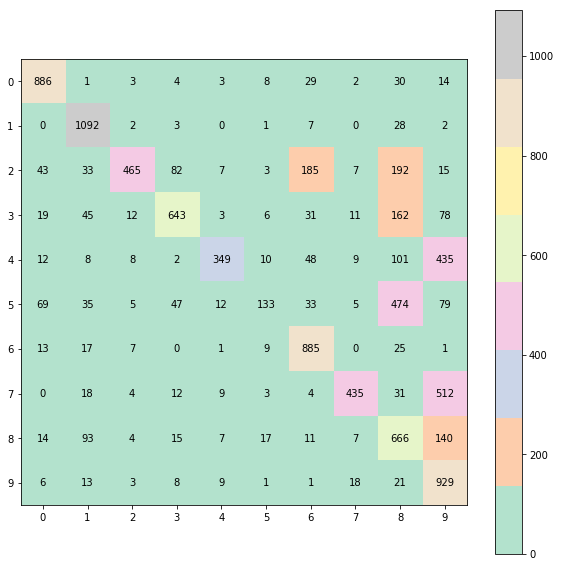

In [9]:
# Calculate confusion matrix
cm_var = mt.confusion_matrix(list(rslt_var[:,0]), list(rslt_var[:,1]));
# Display confusion matrix
utils.showconfmatrix(cm_var, np.arange(10));
# Calculate zero one loss
zol_var = mt.zero_one_loss(list(rslt_var[:,0]), list(rslt_var[:,1]));
print("Zero-one-loss: {0:2.6f} \r\nConfusion Matrix:".format(zol_var));

#### Classifying with covariance matrix

In [10]:
# Creating distributions for every digit's mean
distributions_cov = [st.multivariate_normal(
    mean = means[i].flatten(),
    # Flatten every digit and calculate covariance over all images of a digit
    cov = np.cov(np.array(list(map(lambda d: d.flatten(), digits[i]))).T),
    allow_singular=True
) for i in range(len(digits))];

In [11]:
# Initializing empty result list
rslt_cov = [];
# Classifying test data
for tl in zip(testD, testL):
    # Label data as digit of the distribution with the highest probability
    rslt_cov += [[tl[1], np.argmax(list(map(lambda n: n.logpdf(tl[0].flatten()), distributions_cov)))]];
# Convert result to numpy array for slicing
rslt_cov = np.array(rslt_cov);

Zero-one-loss: 0.186200 
Confusion Matrix:


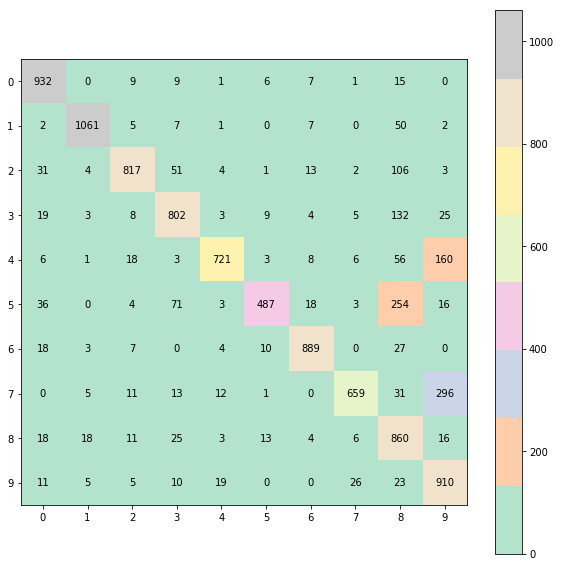

In [12]:
# Calculate confusion matrix
cm_cov = mt.confusion_matrix(list(rslt_cov[:,0]), list(rslt_cov[:,1]));
# Display confusion matrix
utils.showconfmatrix(cm_cov, np.arange(10));
# Calculate zero one loss
zol_cov = mt.zero_one_loss(list(rslt_cov[:,0]), list(rslt_cov[:,1]));
print("Zero-one-loss: {0:2.6f} \r\nConfusion Matrix:".format(zol_cov));

#### Classifying with varaince across all pixels per digit

In [13]:
# Creating distributions for every digit's mean
distributions_var_px = [st.multivariate_normal(
    mean = means[i].flatten(),
    # Flatten all images of a digit into one list and calculate variance over all pixels
    cov = np.var(digits[i]),
    allow_singular=True
) for i in range(len(digits))];

In [14]:
# Initializing empty result list
rslt_var_px = [];
# Classifying test data
for tl in zip(testD, testL):
    # Label data as digit of the distribution with the highest probability
    rslt_var_px += [[tl[1], np.argmax(list(map(lambda n: n.logpdf(tl[0].flatten()), distributions_var_px)))]];
# Convert result to numpy array for slicing
rslt_var_px = np.array(rslt_var_px);

Zero-one-loss: 0.224200 
Confusion Matrix:


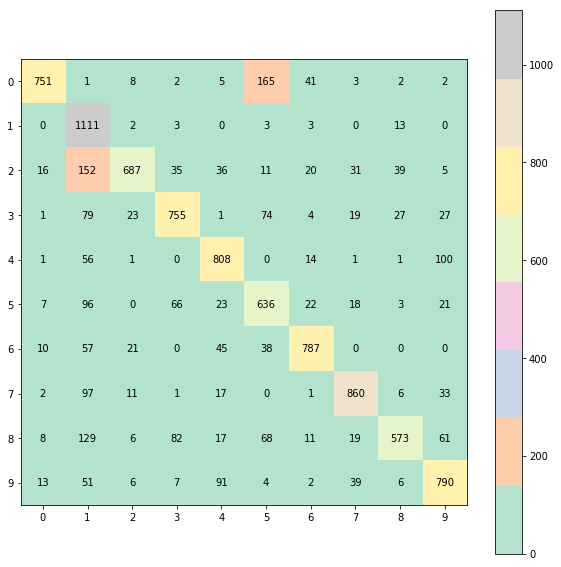

In [15]:
# Calculate confusion matrix
cm_var_px = mt.confusion_matrix(list(rslt_var_px[:,0]), list(rslt_var_px[:,1]));
# Display confusion matrix
utils.showconfmatrix(cm_var_px, np.arange(10));
# Calculate zero one loss
zol_var_px = mt.zero_one_loss(list(rslt_var_px[:,0]), list(rslt_var_px[:,1]));
print("Zero-one-loss: {0:2.6f} \r\nConfusion Matrix:".format(zol_var_px));

#### Weigthing probabilities by distance to mean

In [16]:
# Creating distributions for every digit's mean
dbw = [st.multivariate_normal(
    mean = means[i].flatten(),
    # Flatten every digit and calculate covariance over all images of a digit
    cov = np.cov(np.array(list(map(lambda d: d.flatten(), digits[i]))).T),
    allow_singular=True
) for i in range(len(digits))];

In [17]:
# Initializing empty result list
rslt_weighted = [];
# Classifying test data
for tl in zip(testD, testL):
    # Label data as digit of the distribution with the highest probability weigthed
    # by its distance to the distribution's mean
    rslt_weighted += [[tl[1],
        np.argmax(list(map(lambda i: np.linalg.norm(tl[0].flatten() - means[i].flatten()) * dbw[i].logpdf(tl[0].flatten()), np.arange(10))))]];
# Convert result to numpy array for slicing
rslt_weighted = np.array(rslt_weighted);

Zero-one-loss: 0.119000 
Confusion Matrix:


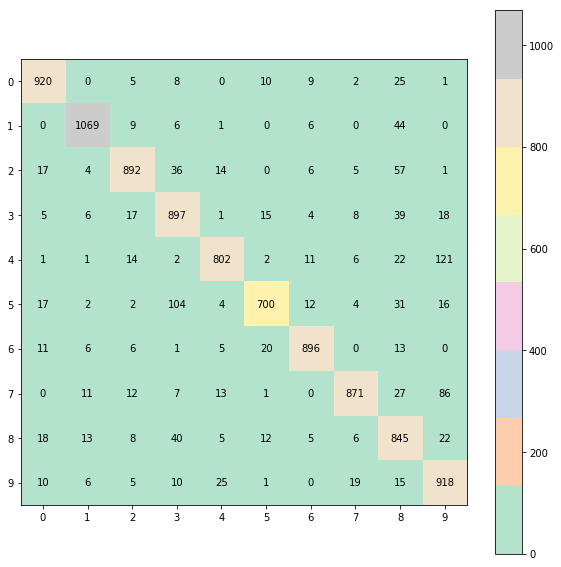

In [18]:
# Calculate confusion matrix
cm_weighted = mt.confusion_matrix(list(rslt_weighted[:,0]), list(rslt_weighted[:,1]));
# Display confusion matrix
utils.showconfmatrix(cm_weighted, np.arange(10));
# Calculate zero one loss
zol_weighted = mt.zero_one_loss(list(rslt_weighted[:,0]), list(rslt_weighted[:,1]));
print("Zero-one-loss: {0:2.6f} \r\nConfusion Matrix:".format(zol_weighted));